In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv("/Users/elgun/Desktop/Machine_Learning_Project/data/regresiion.csv")
data

,No,Property_Type,Land_Area,Floor_Area,Condition,View,Amenities,Furnishing_Status,Air_Conditioning (Yes/No),Heating (Yes/No),...,Location,Num_bathrooms,Num_rooms,Price,distance to nearest MRT Station,distance to nearest Hospital,distance to nearest School,distance to nearest Bus Stand,distance to nearest Airport,Crimerate in area
0,1,Condo,1784,1555,New,NaN,Basic,Fully Furnished,No,Yes,...,Phoenix,3,2,334126,7.06,11.83,3.54,2.67,45.83,9.9
1,2,Farmhouse,1768,1530,New,City View,Basic,Semi Furnished,No,Yes,...,San Francisco,2,3,1895788,3.96,14.28,1.02,1.21,21.99,7.7
2,3,Apartment,2667,2667,Old,Park Facing,Rooftop Access,Fully Furnished,Yes,No,...,Miami,2,3,4397494,14.08,0.92,4.94,0.62,11.06,5.3
3,4,Apartment,1262,1262,Old,City View,NaN,Semi Furnished,Yes,No,...,Chicago,3,4,1367842,14.17,14.21,7.13,0.39,43.88,8.9
4,5,Apartment,1720,1720,Renovated,City View,Parking,Semi Furnished,Yes,No,...,New York,4,6,1403758,6.09,8.50,7.16,4.56,40.70,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,499996,Condo,3815,2060,Renovated,City View,Basic,Semi Furnished,Yes,No,...,Boston,3,4,549973,8.48,17.41,4.18,0.85,24.97,9.3
499996,499997,Villa,6514,4525,Old,City View,"Gym, Swimming Pool",Semi Furnished,Yes,No,...,San Francisco,4,6,8464858,13.31,3.16,8.40,4.79,11.77,1.2
499997,499998,Apartment,2587,2587,Old,City View,Rooftop Access,Semi Furnished,Yes,No,...,Denver,5,3,3475517,8.51,14.24,4.09,0.37,24.30,6.2
499998,499999,Apartment,2897,2897,Old,NaN,Rooftop Access,Semi Furnished,Yes,No,...,Boston,4,5,1616638,7.24,10.08,5.18,4.70,8.78,8.3


No                                      0
Property_Type                           0
Land_Area                               0
Floor_Area                              0
Condition                               0
View                               145019
Amenities                           80172
Furnishing_Status                   39709
Air_Conditioning (Yes/No)               0
Heating (Yes/No)                        0
Kitchen_Type                        39709
Balcony (Yes/No)                        0
Maintenance_Fees                        0
Latitude                                0
Longitude                               0
Location                                0
Num_bathrooms                           0
Num_rooms                               0
Price                                   0
distance to nearest MRT Station         0
distance to nearest Hospital            0
distance to nearest School              0
distance to nearest Bus Stand           0
distance to nearest Airport       

/var/folders/3l/xjpx70415s7_2dljh8_3q2_80000gn/T/ipykernel_58514/3790617569.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)
/var/folders/3l/xjpx70415s7_2dljh8_3q2_80000gn/T/ipykernel_58514/3790617569.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

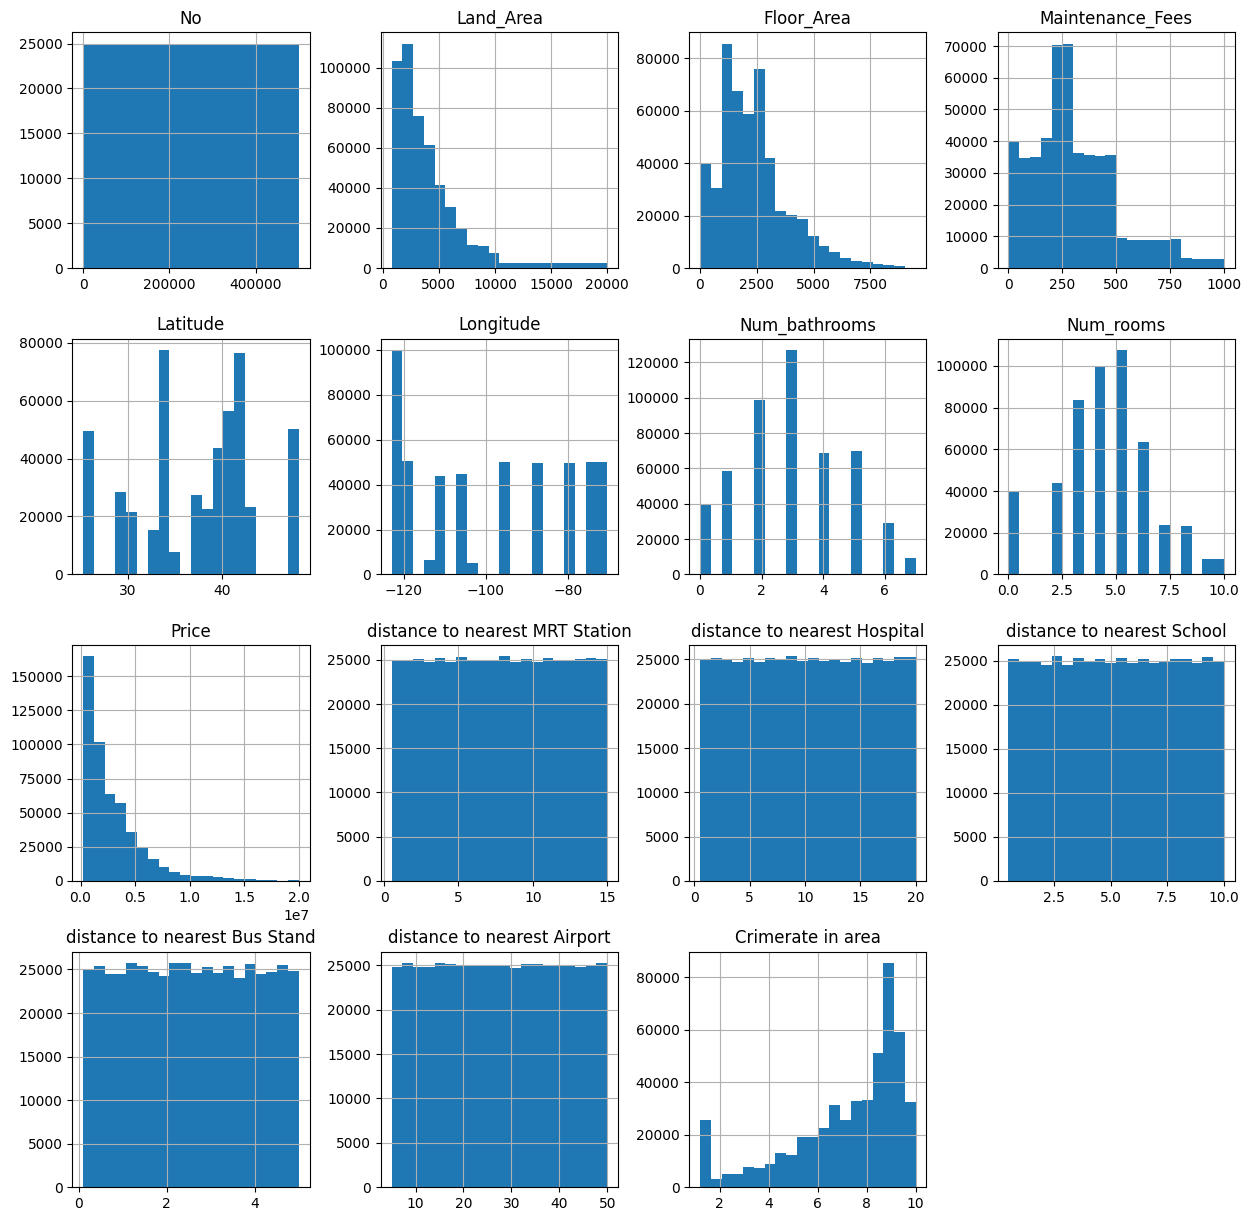

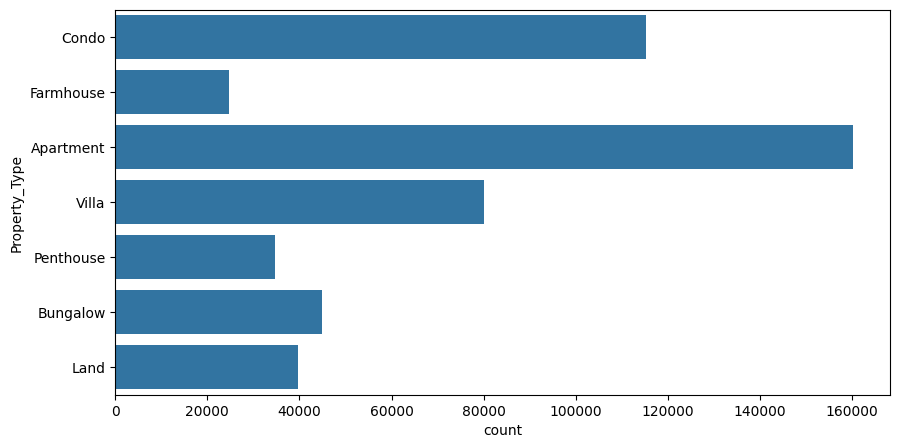

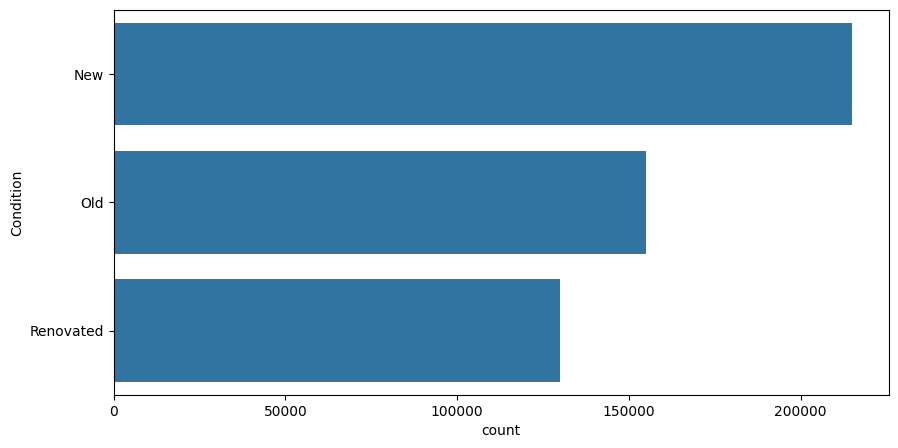

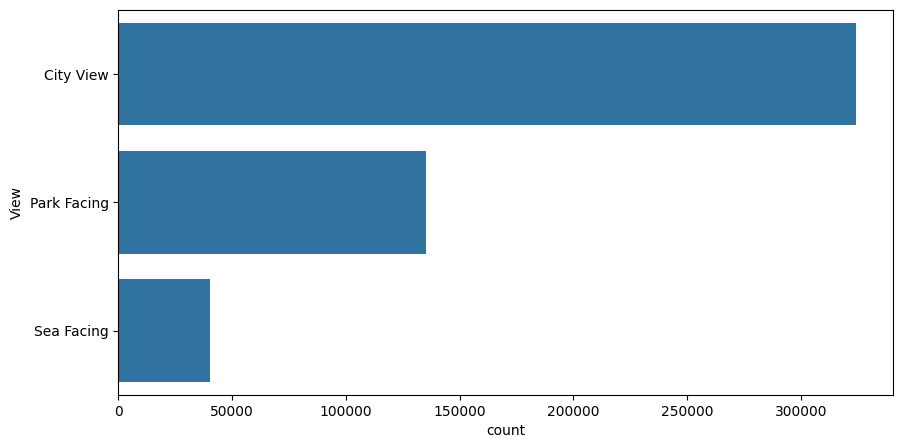

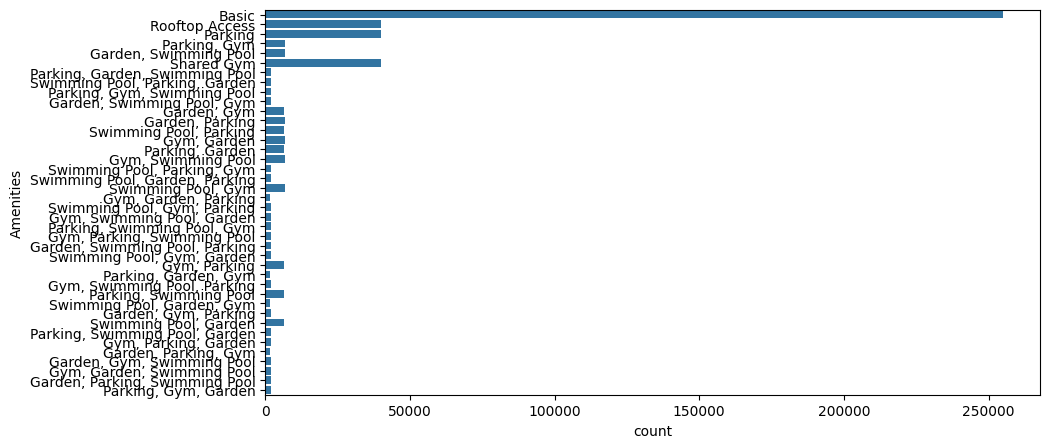

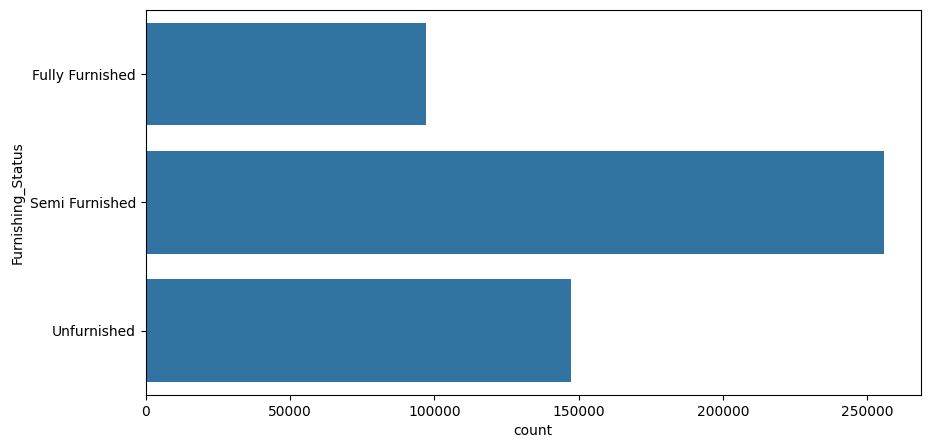

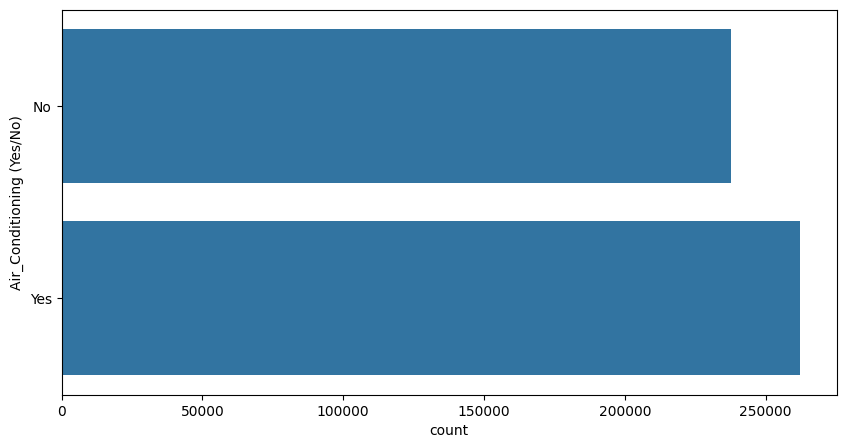

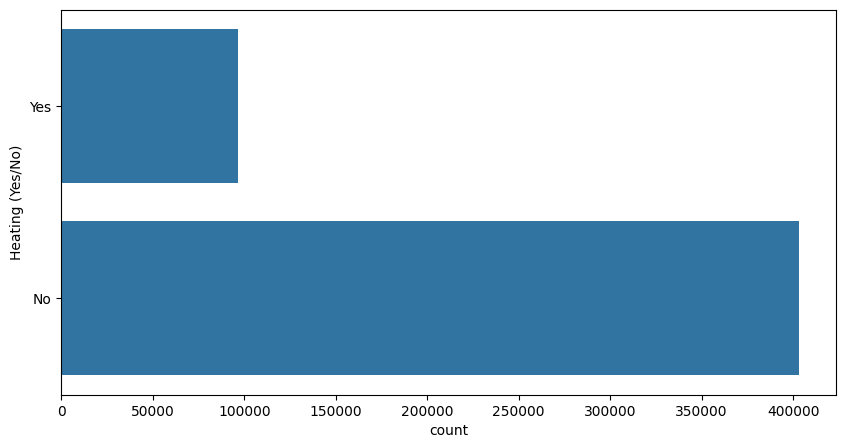

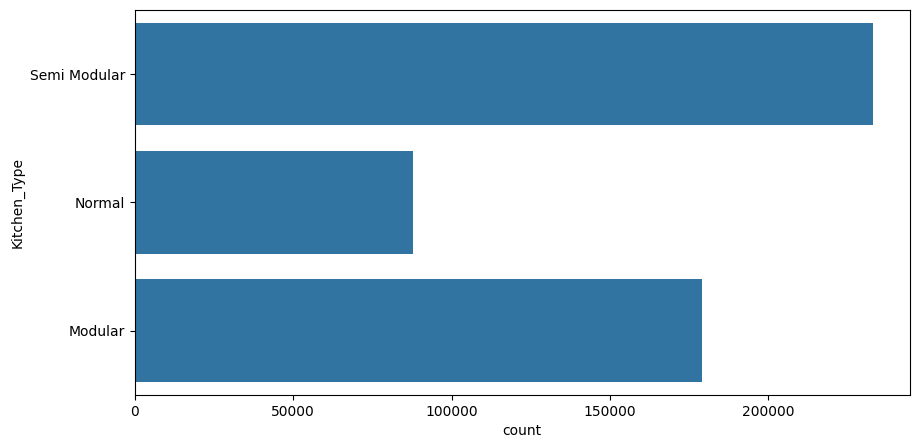

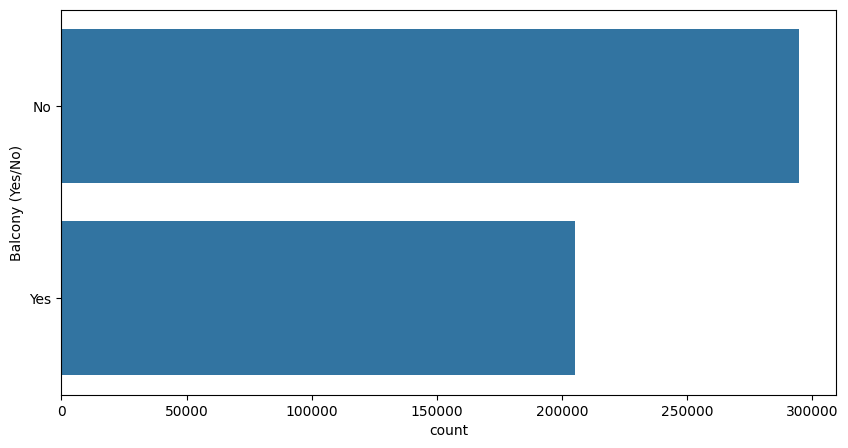

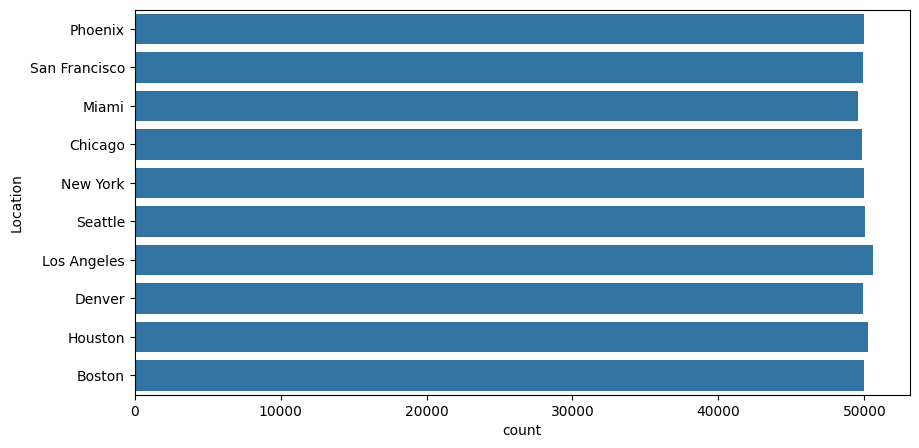

In [30]:
# Checking for missing values
data.isnull().sum()
print(data.isnull().sum())

# Handle missing values (for simplicity, we will fill numerical columns with the mean and categorical columns with the mode)
for column in data.columns:
    if data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].mean(), inplace=True)
        
# Analyze the distribution of numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_features].hist(figsize=(15, 15), bins=20)
plt.show()

# Analyze the distribution of categorical features
categorical_features = data.select_dtypes(include=['object']).columns
for column in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=column, data=data)
    plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical feature
for column in categorical_features:
    data[column] = label_encoder.fit_transform(data[column])

data.head()

,No,Property_Type,Land_Area,Floor_Area,Condition,View,Amenities,Furnishing_Status,Air_Conditioning (Yes/No),Heating (Yes/No),...,Location,Num_bathrooms,Num_rooms,Price,distance to nearest MRT Station,distance to nearest Hospital,distance to nearest School,distance to nearest Bus Stand,distance to nearest Airport,Crimerate in area
0,1,2,1784,1555,0,0,0,0,0,1,...,7,3,2,334126,7.06,11.83,3.54,2.67,45.83,9.9
1,2,3,1768,1530,0,0,0,1,0,1,...,8,2,3,1895788,3.96,14.28,1.02,1.21,21.99,7.7
2,3,0,2667,2667,1,1,29,0,1,0,...,5,2,3,4397494,14.08,0.92,4.94,0.62,11.06,5.3
3,4,0,1262,1262,1,0,0,1,1,0,...,1,3,4,1367842,14.17,14.21,7.13,0.39,43.88,8.9
4,5,0,1720,1720,2,0,19,1,1,0,...,6,4,6,1403758,6.09,8.50,7.16,4.56,40.70,8.2


In [35]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler to each numerical feature
data[numerical_features] = scaler.fit_transform(data[numerical_features])

data.head()

,No,Property_Type,Land_Area,Floor_Area,Condition,View,Amenities,Furnishing_Status,Air_Conditioning (Yes/No),Heating (Yes/No),...,Location,Num_bathrooms,Num_rooms,Price,distance to nearest MRT Station,distance to nearest Hospital,distance to nearest School,distance to nearest Bus Stand,distance to nearest Airport,Crimerate in area
0,0.000000,2,0.051250,0.163857,0,0,0,0,0,1,...,7,0.428571,0.2,0.004764,0.452414,0.581026,0.320000,0.524490,0.907333,0.988636
1,0.000002,3,0.050417,0.161222,0,0,0,1,0,1,...,8,0.285714,0.3,0.083805,0.238621,0.706667,0.054737,0.226531,0.377556,0.738636
2,0.000004,0,0.097240,0.281033,1,1,29,0,1,0,...,5,0.285714,0.3,0.210426,0.936552,0.021538,0.467368,0.106122,0.134667,0.465909
3,0.000006,0,0.024063,0.132982,1,0,0,1,1,0,...,1,0.428571,0.4,0.057084,0.942759,0.703077,0.697895,0.059184,0.864000,0.875000
4,0.000008,0,0.047917,0.181243,2,0,19,1,1,0,...,6,0.571429,0.6,0.058902,0.385517,0.410256,0.701053,0.910204,0.793333,0.795455


In [36]:
from sklearn.model_selection import train_test_split

# Separate the target variable (Price) from the features
y = data['Price']
X = data.drop(['Price', 'No'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400000, 23), (100000, 23), (400000,), (100000,))

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the LinearRegression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions using the testing data
y_pred = model.predict(X_test)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Evaluate the model

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Coefficients: [-3.60214319e-03  2.30955472e-02  5.91880941e-02  9.55400349e-05
  2.92334753e-05 -3.45917374e-04 -5.13690625e-05  3.95897080e-04
  2.72775036e-04 -2.38542624e-04 -6.12731266e-03  5.86637734e-03
  8.87717653e-04  1.13527045e-04  3.38866404e-04 -2.89943982e-03
  1.87345517e-02 -1.53032894e-04 -2.13600897e-04  2.53602400e-04
 -1.05181405e-04 -2.56994268e-05 -4.98712540e-01]
Intercept: 0.462604079116437
Mean Squared Error: 0.0015925791246898238
R^2 Score: 0.9188166979227859


In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Initialize the DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(dt_regressor, X, y, cv=2, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print("Mean Cross-Validation Score (Negative MSE):", mean_cv_score)
print("Standard Deviation of Cross-Validation Score:", std_cv_score)

# Train the model using the training data
dt_regressor.fit(X_train, y_train)

# Make predictions using the testing data
y_pred_dt = dt_regressor.predict(X_test)

# Calculate mean squared error
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Mean Squared Error (Decision Tree):", mse_dt)

# Calculate R^2 score
r2_dt = r2_score(y_test, y_pred_dt)
print("R^2 Score (Decision Tree):", r2_dt)

Mean Cross-Validation Score (Negative MSE): -0.001348222871805208
Standard Deviation of Cross-Validation Score: 1.5343956469470376e-05
Mean Squared Error (Decision Tree): 0.0013064309246805803
R^2 Score (Decision Tree): 0.9334033865212101


In [40]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Perform cross-validation
cv_scores_knn = cross_val_score(knn_regressor, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score_knn = np.mean(cv_scores_knn)
std_cv_score_knn = np.std(cv_scores_knn)

print("Mean Cross-Validation Score (Negative MSE):", mean_cv_score_knn)
print("Standard Deviation of Cross-Validation Score:", std_cv_score_knn)

# Train the model using the training data
knn_regressor.fit(X_train, y_train)

# Make predictions using the testing data
y_pred_knn = knn_regressor.predict(X_test)

# Calculate mean squared error
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error (KNN):", mse_knn)

# Calculate R^2 score
r2_knn = r2_score(y_test, y_pred_knn)
print("R^2 Score (KNN):", r2_knn)


Mean Cross-Validation Score (Negative MSE): -0.00577119403284588
Standard Deviation of Cross-Validation Score: 4.7153480451289946e-05
Mean Squared Error (KNN): 0.005754495322294241
R^2 Score (KNN): 0.7066588875810383


In [41]:
# Compare the performance of the three models

# Create a dictionary to store the performance metrics
model_performance = {
    "Model": ["Linear Regression", "Decision Tree", "K-Nearest Neighbors"],
    "Mean Squared Error": [mse, mse_dt, mse_knn],
    "R^2 Score": [r2, r2_dt, r2_knn]
}

# Convert the dictionary to a DataFrame
performance_df = pd.DataFrame(model_performance)

# Print the performance DataFrame
print(performance_df)

# Determine the best model based on R^2 Score
best_model = performance_df.loc[performance_df['R^2 Score'].idxmax()]

print("\nBest Model:")
print(best_model)

                 Model  Mean Squared Error  R^2 Score
0    Linear Regression            0.001593   0.918817
1        Decision Tree            0.001306   0.933403
2  K-Nearest Neighbors            0.005754   0.706659

Best Model:
Model                 Decision Tree
Mean Squared Error         0.001306
R^2 Score                  0.933403
Name: 1, dtype: object
